In [110]:
# general packages
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import os 
import json
import cv2
import re

# specific packages
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.lines import Line2D
from matplotlib.pyplot import xticks
from scipy.optimize import curve_fit
import matplotlib.ticker as tck
from sklearn.metrics import mean_squared_error
import matplotlib.lines as mlines
from sklearn.linear_model import LinearRegression
from matplotlib.patches import Patch
from matplotlib.font_manager import FontProperties
from scipy.spatial.distance import euclidean
import imageio
import imageio_ffmpeg

# set working directory
os.chdir("/Users/antoine/Harvard/MegasonLab/presentations/20231206_soma")

font_props = {'family': 'Myriad Pro', 'size': 11}
font_props_text = {'family': 'Myriad Pro', 'size': 9}
title_font = FontProperties(family='Myriad Pro', size=11)


# colorblind-friendly colors
CB_palette = ['', '#f781bf', '#984ea3']

# set style
#sns.set_style("white")

In [98]:
with open(f"/Users/antoine/Harvard/MegasonLab/presentations/20231206_soma/division_example/volume_data1.mp4_volumes.json", 'r') as f1:
    volumes1 = json.load(f1)

findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro' not found.
findfont: Font family 'Myriad Pro'

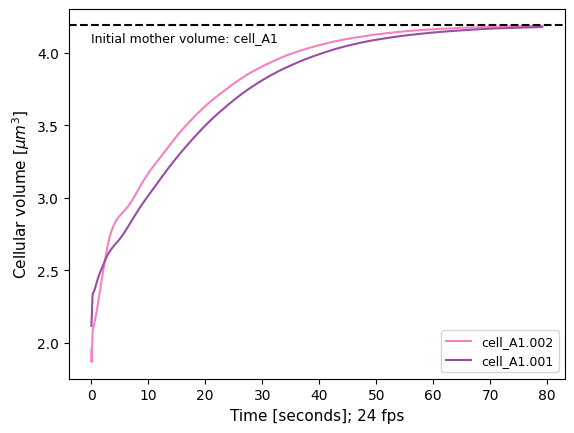

In [99]:
# Frame rate
fps = 24

# Accumulate data for plotting on the same graph
for idx, (cell_name, volumes) in enumerate(volumes1.items()):
    if cell_name != "cell_A1":  # Exclude cell_A1 data
        time_points = [(frame + 1) / fps for frame in range(len(volumes))]  # Convert frames to time
        plt.plot(time_points, volumes, label=cell_name, color=CB_palette[idx])


# Adding a horizontal line at y=4
plt.axhline(y=4.189, color='black', linestyle='--')
plt.text(0, 4.15, 'Initial mother volume: cell_A1', ha='left', va='top', fontdict=font_props_text)

plt.xlabel('Time [seconds]; 24 fps', fontdict=font_props)
plt.ylabel(r'Cellular volume $[\mu m^3]$', fontdict=font_props)
plt.legend(prop=FontProperties(family='Myriad Pro', size=9))

# Save the plot
plt.savefig("division_volumes.png", transparent=False, dpi=500)

In [108]:
# convert sequence of images into mp4

# Path to the directory containing your images
image_folder = 'division_example/'

# Get the list of images
images = [img for img in os.listdir(image_folder) if img.endswith(".png")] # Change the extension as needed
print(images)

# Sort the images based on their names to maintain sequence
images.sort(key=lambda x: int(re.search(r'\d+(?=\.\w+$)', x).group()))

# Define the video output settings
frame_width, frame_height = cv2.imread(os.path.join(image_folder, images[0])).shape[1], cv2.imread(os.path.join(image_folder, images[0])).shape[0]
video_name = 'division_example_clip.mp4'

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter(video_name, fourcc, 24.0, (frame_width, frame_height))

# Iterate through the images and write to the video
for image in images:
    img_path = os.path.join(image_folder, image)
    frame = cv2.imread(img_path)
    out.write(frame)

# Release the VideoWriter object
out.release()


['division_example.mp40846.png', 'division_example.mp40852.png', 'division_example.mp40107.png', 'division_example.mp40661.png', 'division_example.mp40675.png', 'division_example.mp40113.png', 'division_example.mp40885.png', 'division_example.mp40891.png', 'division_example.mp40649.png', 'division_example.mp40488.png', 'division_example.mp40463.png', 'division_example.mp40305.png', 'division_example.mp40311.png', 'division_example.mp40477.png', 'division_example.mp40339.png', 'division_example.mp40517.png', 'division_example.mp40271.png', 'division_example.mp40265.png', 'division_example.mp40503.png', 'division_example.mp40259.png', 'division_example.mp40932.png', 'division_example.mp40926.png', 'division_example.mp40098.png', 'division_example.mp40073.png', 'division_example.mp40715.png', 'division_example.mp40701.png', 'division_example.mp40067.png', 'division_example.mp40729.png', 'division_example.mp40728.png', 'division_example.mp40700.png', 'division_example.mp40066.png', 'divisi

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
